# Step 1: Data Preparation

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the dataset
credit_card_data = pd.read_csv('C:/Users/DELL/Downloads/credit_card.csv')

In [3]:
# Display the first few rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Display basic information about the dataset
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Check for missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Display the distribution of legitimate transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# Step 2: Data Exploration

In [7]:
# Statistical measures of the data for legitimate transactions
legit = credit_card_data[credit_card_data.Class == 0]
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
# Statistical measures of the data for fraudulent transactions
fraud = credit_card_data[credit_card_data.Class == 1]
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
# Compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Step 3: Data Balancing

In [10]:
# Create a balanced dataset with equal number of legitimate and fraudulent transactions
legit_sample = legit.sample(n=492)

In [11]:
fresh_df = pd.concat([legit_sample,fraud],axis=0)

In [12]:
fresh_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
167315,118610.0,2.005651,-0.390417,-0.660715,0.064059,-0.219630,0.197566,-0.687277,0.230806,1.110522,...,-0.143064,-0.413273,0.346947,0.116351,-0.420296,-0.631710,0.017382,-0.041818,1.18,0
244104,152206.0,-0.295329,1.152912,-0.710047,-0.565327,0.585467,-0.658444,0.511448,0.464585,-0.460431,...,-0.230994,-0.727916,0.177973,0.654738,-0.446464,0.088837,0.089992,0.005261,12.99,0
57740,48049.0,-0.329467,0.852885,1.352612,0.598585,0.511579,0.452830,0.599082,0.227923,-0.520674,...,-0.000807,0.173465,-0.259116,-0.291606,0.244450,-0.350051,0.062808,0.007579,5.00,0
169646,119794.0,1.935774,-0.827986,-1.703976,-0.619104,1.644463,3.937280,-1.288438,1.052024,1.117499,...,0.226845,0.724858,0.149522,0.770421,-0.202032,0.646084,-0.003800,-0.050829,29.99,0
171931,120881.0,1.907228,-1.206287,-1.454678,-0.874484,-0.466570,-0.427273,-0.308918,-0.128194,-0.594599,...,0.099674,-0.023448,0.147480,0.708949,-0.159643,-0.391348,-0.063513,-0.041217,145.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [13]:
fresh_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [14]:
fresh_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96970.619919,0.074343,-0.099046,-0.027835,-0.111562,-0.019280,-0.133519,-0.149625,-0.038667,-0.001540,...,0.003655,0.003721,0.019372,-0.000996,0.039933,-0.013001,-0.016253,0.007163,0.014891,79.005407
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
X = fresh_df.drop(columns='Class', axis=1)
Y = fresh_df['Class']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Step 4: Model Training

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
# Split the data into features (X) and target variable (Y)
X = fresh_df.drop(columns='Class', axis=1)
Y = fresh_df['Class']

In [19]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [20]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [21]:
# Predictions on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9479034307496823


In [22]:
# Predictions on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9289340101522843


# Step 5: EDA ( Exploratory Data Analysis)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

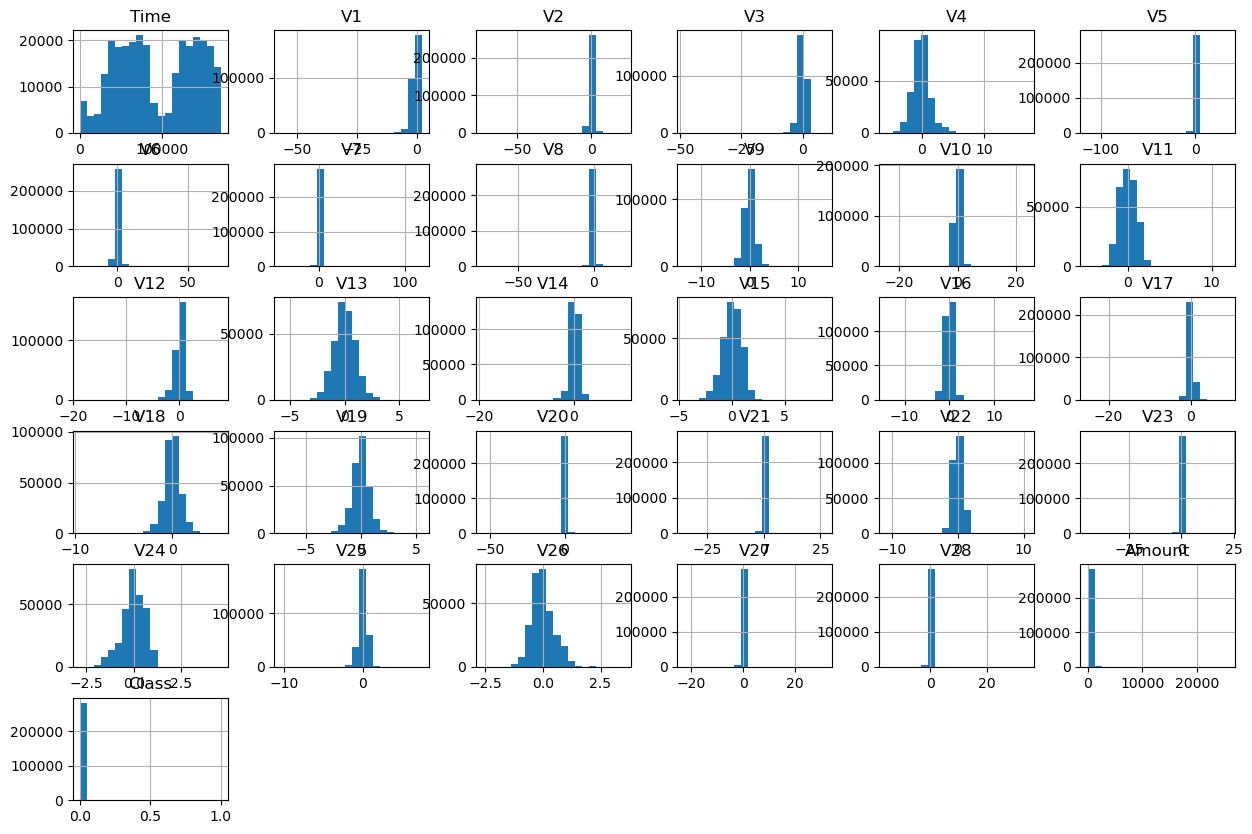

In [36]:
# Histograms for Distribution
credit_card_data.hist(bins=20, figsize=(15, 10))
plt.show()

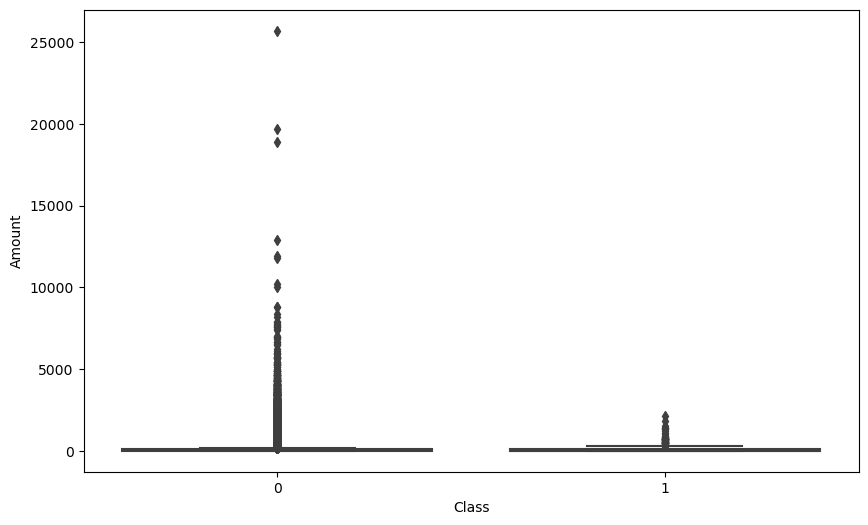

In [25]:
# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=credit_card_data)
plt.show()

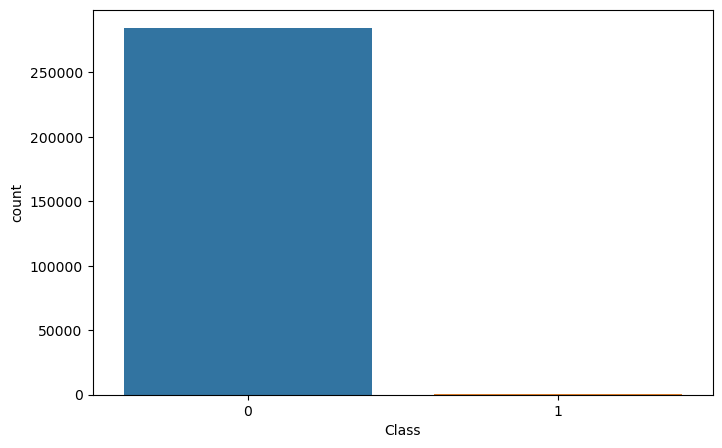

In [26]:
# Count Plots
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=credit_card_data)
plt.show()

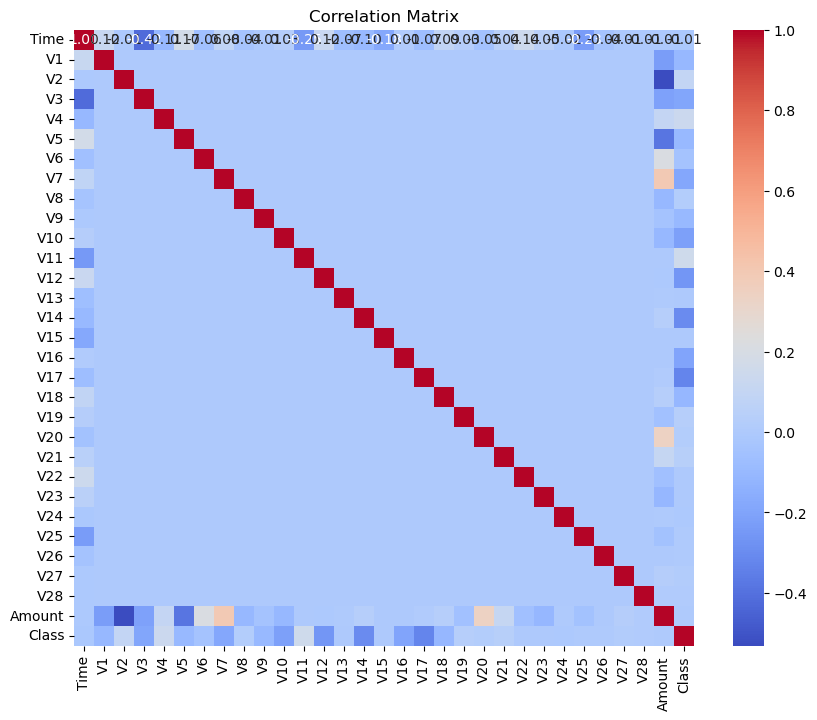

In [27]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = credit_card_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Step 6: Model Evaluation

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [29]:
# Predictions on test data
X_test_prediction = model.predict(X_test)

In [30]:
# Calculate accuracy score
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9289340101522843


In [31]:
# Calculate precision score
precision = precision_score(Y_test, X_test_prediction)
print('Precision : ', precision)

Precision :  0.9375


In [32]:
# Calculate recall score
recall = recall_score(Y_test, X_test_prediction)
print('Recall : ', recall)

Recall :  0.9183673469387755


In [33]:
# Calculate F1-score
f1 = f1_score(Y_test, X_test_prediction)
print('F1-score : ', f1)

F1-score :  0.9278350515463918


In [34]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print('Confusion Matrix : \n', conf_matrix)

Confusion Matrix : 
 [[93  6]
 [ 8 90]]


In [35]:
# Classification report
class_report = classification_report(Y_test, X_test_prediction)
print('Classification Report : \n', class_report)

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        99
           1       0.94      0.92      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

